In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# for regressions:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sklm

# for KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#for model evaluation and pre-processing tools:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for modeling with decision trees:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

#for model tuning:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO
!pip install dmba
#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import matplotlib.pylab as plt
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (12, 5))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 124.7 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
world_data = pd.read_csv('/content/drive/MyDrive/worlddata.csv')

Mounted at /content/drive


In [ ]:
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
pivoted_df = world_data.pivot(index=['CountryName','CountryCode','Year'], columns='IndicatorCode', values='Value').reset_index()

In [ ]:
pivoted_df.head()

IndicatorCode,CountryName,CountryCode,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,...,per_allsp.cov_pop_tot,per_lm_alllm.adq_pop_tot,per_lm_alllm.ben_q1_tot,per_lm_alllm.cov_pop_tot,per_sa_allsa.adq_pop_tot,per_sa_allsa.ben_q1_tot,per_sa_allsa.cov_pop_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,120.0,NaN,NaN,377000.0,57.745918,7650000.0,0.834702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,150.0,NaN,NaN,377600.0,57.837821,7700000.0,0.824078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,200.0,NaN,NaN,378100.0,57.914407,7750000.0,0.813089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,200.0,NaN,NaN,378730.0,58.010906,7800000.0,0.801756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivoted_df.shape

(13831, 1347)

In [ ]:
#pivoted_df[pivoted_df.Year == 2003].dropna(how='any', axis = 1)

In [ ]:
linreg=sklm.LinearRegression()

In [ ]:
# linreg.fit(pivoted_df.drop(['SP.DYN.LE00.IN','CountryName','CountryCode'], axis=1).values,
#            pivoted_df['SP.DYN.LE00.IN'])





In [ ]:
#world_data[world_data.IndicatorName == "Life expectancy at birth, total (years)"]

In [ ]:
pivoted_df['SP.DYN.LE00.IN']

,SP.DYN.LE00.IN
0,32.328512
1,32.777439
2,33.219902
3,33.657878
4,34.092878
...,...
13826,51.600366
13827,53.643073
13828,55.633000
13829,NaN


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
na_filled = imputer.fit_transform(pivoted_df.drop(['CountryName','CountryCode'], axis=1))

In [ ]:
na_filled

array([[1.96000000e+03, 6.99924138e+05, 1.10400424e+03, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01],
       [1.96100000e+03, 1.20000000e+02, 1.10400424e+03, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01],
       [1.96200000e+03, 1.50000000e+02, 1.10400424e+03, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01],
       ...,
       [2.01300000e+03, 6.99924138e+05, 2.77783019e+02, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01],
       [2.01400000e+03, 6.99924138e+05, 1.10400424e+03, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01],
       [2.01500000e+03, 6.99924138e+05, 1.10400424e+03, ...,
        3.29850075e+01, 4.65001360e+00, 2.03859440e+01]])

In [ ]:


imputer = SimpleImputer(strategy='mean')

# Choose the numeric columns
numeric_df = pivoted_df.drop(['CountryName', 'CountryCode'], axis=1)

# Impute
na_filled_array = imputer.fit_transform(numeric_df)

# Convert back to dataframe with the same column names
na_filled = pd.DataFrame(na_filled_array, columns=numeric_df.columns)
na_filled = pd.concat(
    [pivoted_df[['CountryName', 'CountryCode']], na_filled],
    axis=1
)


In [ ]:
na_filled

IndicatorCode,CountryName,CountryCode,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,...,per_allsp.cov_pop_tot,per_lm_alllm.adq_pop_tot,per_lm_alllm.ben_q1_tot,per_lm_alllm.cov_pop_tot,per_sa_allsa.adq_pop_tot,per_sa_allsa.ben_q1_tot,per_sa_allsa.cov_pop_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot
0,Afghanistan,AFG,1960.0,699924.138459,1104.004242,234.718437,1.412248e+06,37.242071,6.563184e+06,0.271650,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
1,Afghanistan,AFG,1961.0,120.000000,1104.004242,234.718437,3.770000e+05,57.745918,7.650000e+06,0.834702,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
2,Afghanistan,AFG,1962.0,150.000000,1104.004242,234.718437,3.776000e+05,57.837821,7.700000e+06,0.824078,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
3,Afghanistan,AFG,1963.0,200.000000,1104.004242,234.718437,3.781000e+05,57.914407,7.750000e+06,0.813089,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
4,Afghanistan,AFG,1964.0,200.000000,1104.004242,234.718437,3.787300e+05,58.010906,7.800000e+06,0.801756,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13826,Zimbabwe,ZWE,2011.0,699924.138459,195.732595,29.453095,1.640000e+05,42.393693,4.200000e+06,0.294621,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13827,Zimbabwe,ZWE,2012.0,699924.138459,170.938235,29.059500,1.620000e+05,41.876696,4.000000e+06,0.274622,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13828,Zimbabwe,ZWE,2013.0,699924.138459,277.783019,36.806250,1.620000e+05,41.876696,4.000000e+06,0.268491,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13829,Zimbabwe,ZWE,2014.0,699924.138459,1104.004242,234.718437,1.412248e+06,37.242071,6.563184e+06,0.271650,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944


In [ ]:
# linerreg = linreg.fit(na_filled.drop(['SP.DYN.LE00.IN','CountryName','CountryCode'], axis=1).values,
#            na_filled['SP.DYN.LE00.IN'])

In [ ]:
# print(linerreg.coef_)
# print(linerreg.intercept_)

In [ ]:
USA_data = na_filled[na_filled.CountryName == 'United States']

In [ ]:
USA_data.shape

(56, 1347)

In [ ]:
X = na_filled.drop(['SP.DYN.LE00.IN','CountryName','CountryCode'], axis=1)
Y = na_filled['SP.DYN.LE00.IN']

In [ ]:
from dmba import backward_elimination, forward_selection, stepwise_selection

In [ ]:
# def train_model(variables):
#     model = sklm.LinearRegression()
#     model.fit(X[variables], Y)
#     return model

# def score_model(model, variables):
#     return AIC_score(Y, model.predict(X[variables]), model) #using AIC_score as model evaluation metrics

# best_model, best_variables = backward_elimination(X.columns, train_model, score_model, verbose=True)

# print(best_variables)

In [ ]:
#best_model.summary

In [ ]:
# best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
# print(best_variables)

In [ ]:
X = USA_data.drop(['SP.DYN.LE00.IN','CountryName','CountryCode'], axis=1)
Y = USA_data['SP.DYN.LE00.IN']

In [ ]:
# def train_model(variables):
#     model = sklm.LinearRegression()
#     model.fit(X[variables], Y)
#     return model

# def score_model(model, variables):
#     return AIC_score(Y, model.predict(X[variables]), model) #using AIC_score as model evaluation metrics

# best_model, best_variables = backward_elimination(X.columns, train_model, score_model, verbose=True)

# print(best_variables)

In [ ]:
sp_cols = USA_data.filter(regex="^SP").columns
other_cols = ['CountryName', 'CountryCode', 'Year']

X = USA_data.drop(list(sp_cols) + other_cols, axis=1)
Y = USA_data['SP.DYN.LE00.IN']

In [ ]:
DTreg_bag=RandomForestRegressor(max_features=3, random_state=20)

In [ ]:
DTreg_bag.fit(X, Y)

RandomForestRegressor(max_features=3, random_state=20)

In [ ]:
DTbag_predictions_tr=DTreg_bag.predict(X)

In [ ]:
regressionSummary(Y, DTbag_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.0424
       Root Mean Squared Error (RMSE) : 0.5269
            Mean Absolute Error (MAE) : 0.1932
          Mean Percentage Error (MPE) : -0.0814
Mean Absolute Percentage Error (MAPE) : 0.2809


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(DTreg_bag)
shap_values=explainer.shap_values(X) #shap_values: Shapley values attribute a share of the prediction to each feature based on its contribution
expected_value = explainer.expected_value

In [ ]:
pd.set_option('display.max_colwidth', None)

world_data[world_data.IndicatorCode == 'SL.EMP.WORK.MA.ZS'].head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1024701,Australia,AUS,"Wage and salary workers, male (% of males employed)",SL.EMP.WORK.MA.ZS,1980,82.199997


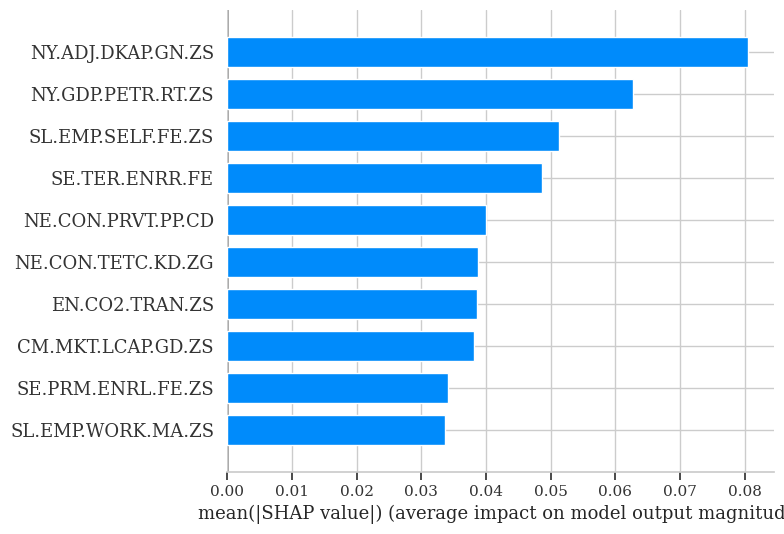

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar",  max_display=10)

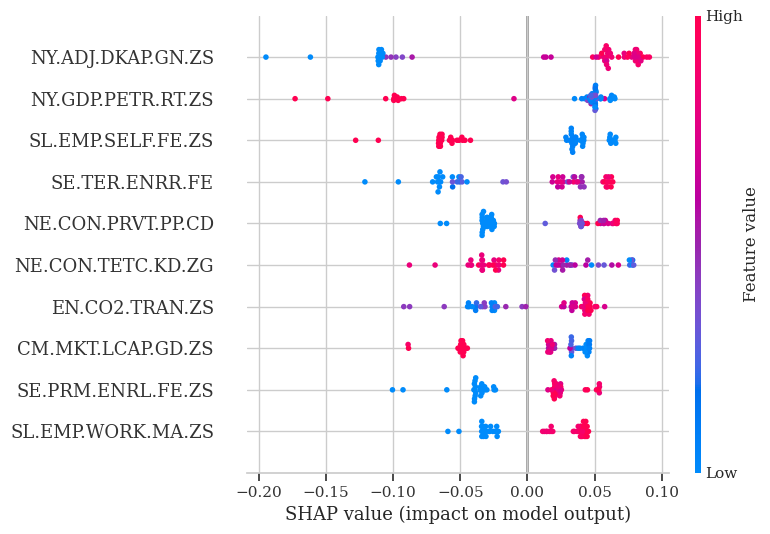

In [ ]:
shap.summary_plot(shap_values, X, max_display=10)

In [ ]:
sp_cols = USA_data.filter(regex="^SP").columns
other_cols = ['CountryName', 'CountryCode', 'Year']

X = USA_data.drop(list(sp_cols) + other_cols, axis=1)
Y = USA_data['SP.DYN.LE00.IN']
DT_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=20)
DT_boost.fit(X, Y)
explainer = shap.TreeExplainer(DT_boost)
shap_values=explainer.shap_values(X) #shap_values: Shapley values attribute a share of the prediction to each feature based on its contribution
expected_value = explainer.expected_value

In [ ]:
DTboost_predictions_tr=DT_boost.predict(X)

In [ ]:
regressionSummary(Y, DTboost_predictions_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0282
            Mean Absolute Error (MAE) : 0.0202
          Mean Percentage Error (MPE) : -0.0017
Mean Absolute Percentage Error (MAPE) : 0.0278


In [ ]:
world_data[world_data.IndicatorCode == 'NY.ADJ.DKAP.CD'].head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
306962,Afghanistan,AFG,Adjusted savings: consumption of fixed capital (current US$),NY.ADJ.DKAP.CD,1970,9.627269e+07


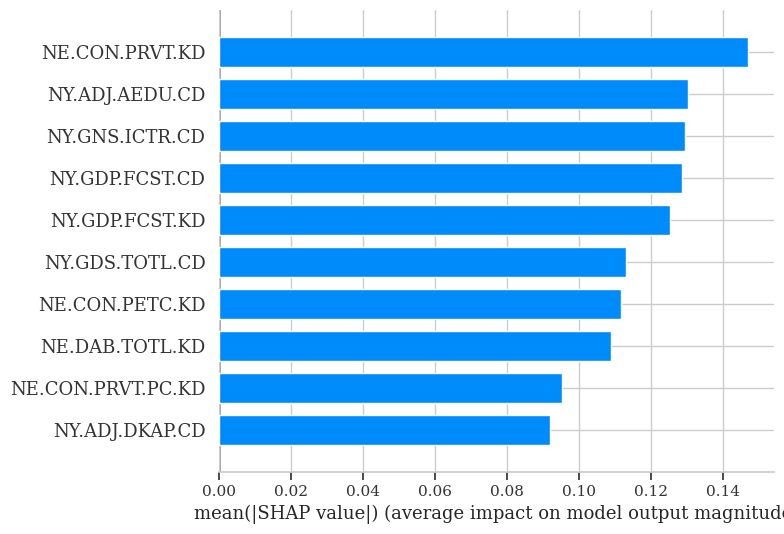

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10)

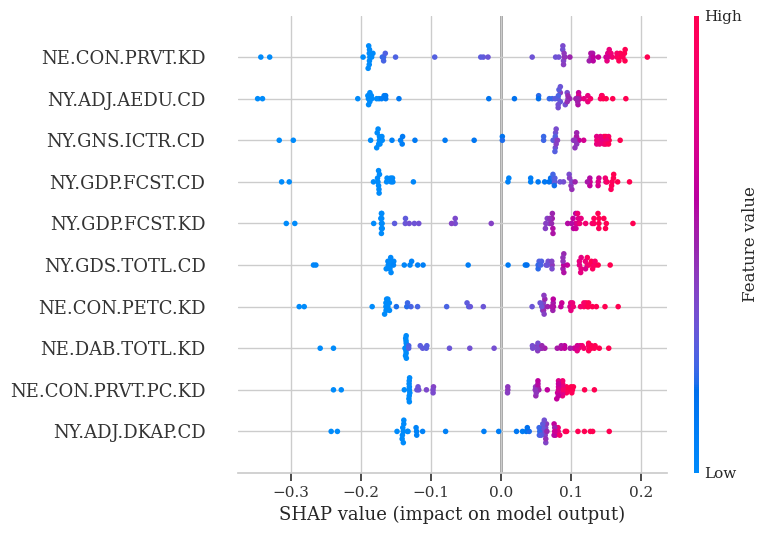

In [ ]:
shap.summary_plot(shap_values, X, max_display=10)

In [ ]:
world_data[world_data.IndicatorCode == 'TT.PRI.MRCH.XD.WD']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1023104,Algeria,DZA,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,1980,168.354430
1024100,Argentina,ARG,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,1980,106.250000
1026024,Bangladesh,BGD,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,1980,136.666667
1027735,Benin,BEN,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,1980,86.363636
1028675,Bolivia,BOL,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,1980,187.500000
...,...,...,...,...,...,...
5531038,Vietnam,VNM,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,2013,98.639249
5531839,West Bank and Gaza,WBG,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,2013,74.213755
5532449,"Yemen, Rep.",YEM,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,2013,165.532216
5533255,Zambia,ZMB,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,2013,177.069480


In [ ]:
year_data = na_filled[(na_filled.Year == 2014) | (na_filled.Year == 2013) | (na_filled.Year == 2012)]
year_data

IndicatorCode,CountryName,CountryCode,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,...,per_allsp.cov_pop_tot,per_lm_alllm.adq_pop_tot,per_lm_alllm.ben_q1_tot,per_lm_alllm.cov_pop_tot,per_sa_allsa.adq_pop_tot,per_sa_allsa.ben_q1_tot,per_sa_allsa.cov_pop_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot
52,Afghanistan,AFG,2012.0,699924.138459,229.744806,4.599615,3.791000e+05,58.067580,7.790000e+06,0.262053,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
53,Afghanistan,AFG,2013.0,699924.138459,265.634675,5.069750,3.791000e+05,58.067580,7.785000e+06,0.253728,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
54,Afghanistan,AFG,2014.0,699924.138459,1104.004242,234.718437,1.412248e+06,37.242071,6.563184e+06,0.271650,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
108,Albania,ALB,2012.0,699924.138459,1104.004242,92.771765,1.201300e+04,43.843066,6.191000e+05,0.213447,...,55.056408,12.226881,25.158490,14.222812,7.125424,22.614157,19.440254,33.232054,12.227686,36.255063
109,Albania,ALB,2013.0,699924.138459,1104.004242,87.476908,1.187300e+04,43.332117,6.171000e+05,0.212987,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,Zambia,ZMB,2013.0,699924.138459,1104.004242,42.107838,2.373600e+05,31.929404,3.700000e+06,0.242685,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13773,Zambia,ZMB,2014.0,699924.138459,1104.004242,234.718437,1.412248e+06,37.242071,6.563184e+06,0.271650,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13827,Zimbabwe,ZWE,2012.0,699924.138459,170.938235,29.059500,1.620000e+05,41.876696,4.000000e+06,0.274622,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944
13828,Zimbabwe,ZWE,2013.0,699924.138459,277.783019,36.806250,1.620000e+05,41.876696,4.000000e+06,0.268491,...,48.129359,13.128845,19.175144,4.993653,10.290802,24.429059,35.720403,32.985007,4.650014,20.385944


In [ ]:
sp_cols = year_data.filter(regex="^SP").columns
other_cols = ['CountryName', 'CountryCode', 'Year']

X = year_data.drop(list(sp_cols) + other_cols, axis=1)
Y = year_data['SP.DYN.LE00.IN']
DTreg_bag=RandomForestRegressor(max_features=3, random_state=20)
DTreg_bag.fit(X, Y)
explainer = shap.TreeExplainer(DTreg_bag)
shap_values=explainer.shap_values(X) #shap_values: Shapley values attribute a share of the prediction to each feature based on its contribution
expected_value = explainer.expected_value

In [ ]:
DTbag_predictions_tr=DTreg_bag.predict(X)

In [ ]:
regressionSummary(Y, DTbag_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.0035
       Root Mean Squared Error (RMSE) : 1.1689
            Mean Absolute Error (MAE) : 0.8215
          Mean Percentage Error (MPE) : -0.1496
Mean Absolute Percentage Error (MAPE) : 1.2350


In [ ]:
pd.set_option('display.max_colwidth', None)

world_data[world_data.IndicatorCode == 'IC.BUS.DFRN.XQ'].head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4660539,Arab World,ARB,Distance to frontier score (0=lowest performance to 100=frontier),IC.BUS.DFRN.XQ,2009,57.1205


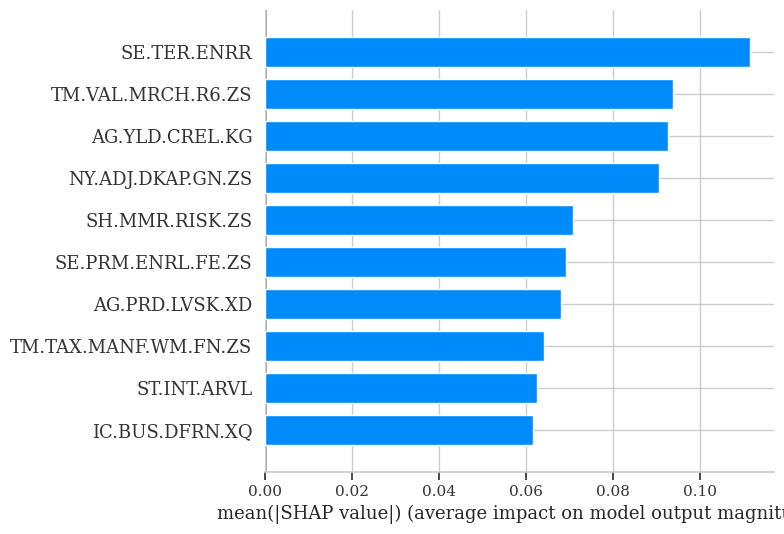

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10)

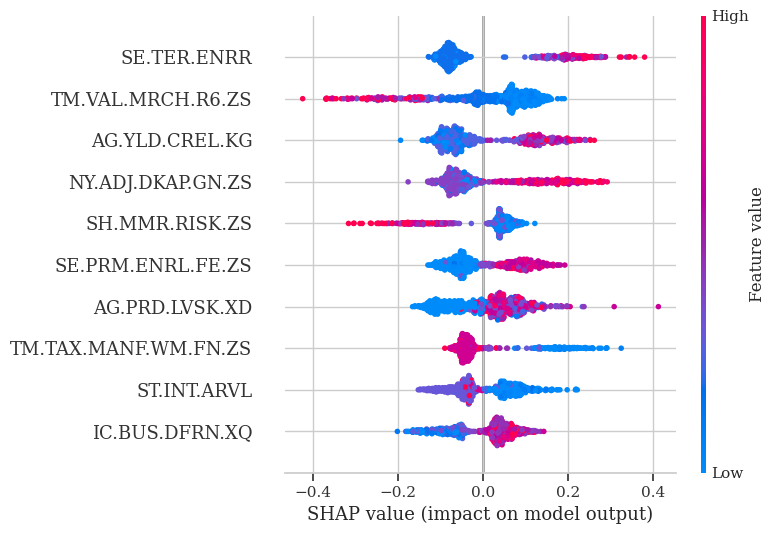

In [ ]:
shap.summary_plot(shap_values, X, max_display=10)

In [ ]:
sp_cols = year_data.filter(regex="^SP").columns
other_cols = ['CountryName', 'CountryCode', 'Year']

X = year_data.drop(list(sp_cols) + other_cols, axis=1)
Y = year_data['SP.DYN.LE00.IN']
DT_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=20)
DT_boost.fit(X, Y)
explainer = shap.TreeExplainer(DT_boost)
shap_values=explainer.shap_values(X) #shap_values: Shapley values attribute a share of the prediction to each feature based on its contribution
expected_value = explainer.expected_value

In [ ]:
DTboost_predictions_tr=DT_boost.predict(X)

In [ ]:
regressionSummary(Y, DTboost_predictions_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.4182
            Mean Absolute Error (MAE) : 0.9676
          Mean Percentage Error (MPE) : -0.1215
Mean Absolute Percentage Error (MAPE) : 1.4330


In [ ]:
world_data[world_data.IndicatorCode == 'AG.PRD.FOOD.XD'].head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
23212,Arab World,ARB,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1961,22.758203


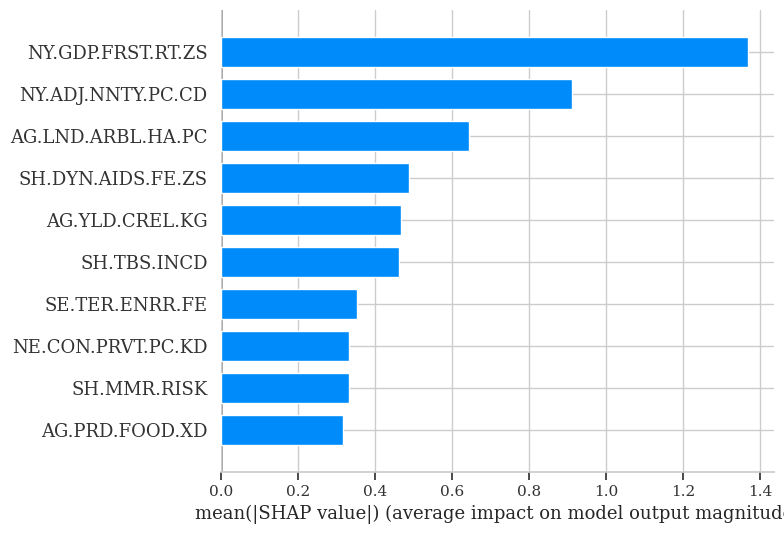

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10)

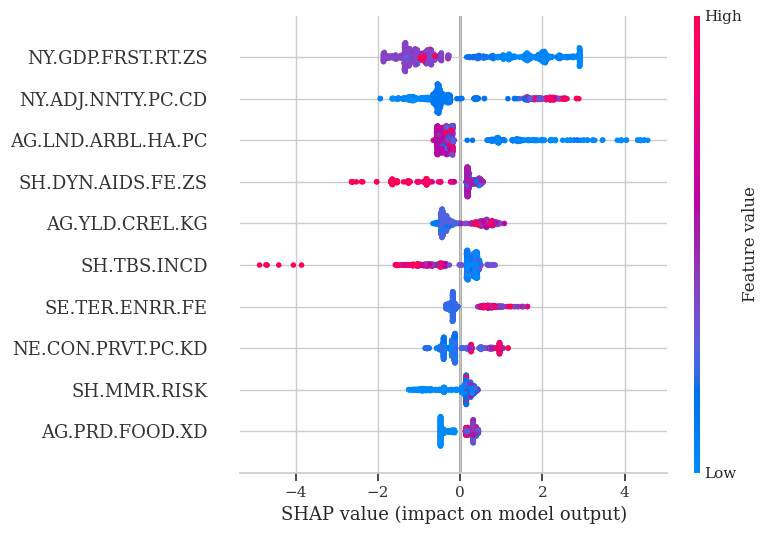

In [ ]:
shap.summary_plot(shap_values, X, max_display=10)